### Exercises: Decision trees, random forests and K-means

1. We load the iris dataset for you in the next code. We provide you with the X and y(=target) variable.
 a. Count the different values for y
 b. Fit a decision tree on this set. Use cross-validation and calculate the accuracy on the validation sets.
    What other metrics are important for classification problems like this one?
 c. Makes it any difference if we use  a standard scaler?



In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load the wine dataset and take 'target' as the value you need to predict
wine = load_wine()

# Convert to a Pandas DataFrame for easier exploration
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)
X.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
#SOLUTION_START
print(y.value_counts()) #print the different values
#SOLUTION_END

In [11]:
#SOLUTION_START

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline with scaling and Decision Tree
DTree =  DecisionTreeClassifier(random_state=42)  # Decision Tree classifier


# Perform cross-validation
scores_dt = cross_val_score(DTree, X_train, y_train, cv=5, scoring='accuracy')

print(f"\nDecision Tree:")
print(f"Mean Cross-Validation Accuracy: {scores_dt.mean():.4f}")

# Fit the model to the training set
DTree.fit(X_train, y_train)

# Evaluate on the test set
y_pred_dt = DTree.predict(X_test)
print(f"Test Accuracy: {DTree.score(X_test, y_test):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
#other important metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
#SOLUTION_END

1    71
0    59
2    48
Name: count, dtype: int64

Decision Tree:
Mean Cross-Validation Accuracy: 0.9163
Test Accuracy: 0.9444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:
 [[11  1  0]
 [ 0 14  0]
 [ 0  1  9]]


In [9]:
#SOLUTION_START
print(y.value_counts()) #print the different values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline with scaling and Decision Tree
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),            # Standardize features
    ('classifier', DecisionTreeClassifier(random_state=42))  # Decision Tree classifier
])

# Perform cross-validation
scores_dt = cross_val_score(pipeline_dt, X_train, y_train, cv=5, scoring='accuracy')

print(f"\nDecision Tree:")
print(f"Mean Cross-Validation Accuracy: {scores_dt.mean():.4f}")

# Fit the model to the training set
pipeline_dt.fit(X_train, y_train)

# Evaluate on the test set
y_pred_dt = pipeline_dt.predict(X_test)
print(f"Test Accuracy: {pipeline_dt.score(X_test, y_test):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
#other important metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
#SOLUTION_END

1    71
0    59
2    48
Name: count, dtype: int64

Decision Tree:
Mean Cross-Validation Accuracy: 0.9163
Test Accuracy: 0.9444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:
 [[11  1  0]
 [ 0 14  0]
 [ 0  1  9]]


2. We load the same iris dataset for you in the next code. We provide you again  with the X and y(=target) variable.
 a.  Fit a random forest with 100 decision trees on this set. Use cross-validation and calculate the accuracy on the validation sets (.
    What other metrics are important for classification problems like this one?
 b. Is the result better than for the decision tree?


In [13]:
#SOLUTION_START
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with scaling and Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42) # Random Forest classifier

# Perform cross-validation
scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print(f"\nRandom Forest:")
print(f"Mean Cross-Validation Accuracy: {scores_rf.mean():.4f}")

# Fit the model to the training set
rf.fit(X_train, y_train)

# Evaluate on the test set
y_pred_rf = rf.predict(X_test)
print(f"Test Accuracy: {rf.score(X_test, y_test):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
#SOLUTION_END


Random Forest:
Mean Cross-Validation Accuracy: 0.9862
Test Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


3. We load the same iris dataset for you in the next code. We provide you again  with the X and y(=target) variable.
 a.  Fit a K-means with 3 values on this set. Use cross-validation and calculate the accuracy on the validation sets (.
    What other metrics are important for classification problems like this one?
 b. Is the result better than for the decision tree? Why?
 c. Visualize the clusters (using PCA to reduce to 2 dimensions for plotting)


Confusion Matrix:
 [[ 0  0 59]
 [65  3  3]
 [ 0 48  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.06      0.04      0.05        71
           2       0.00      0.00      0.00        48

    accuracy                           0.02       178
   macro avg       0.02      0.01      0.02       178
weighted avg       0.02      0.02      0.02       178



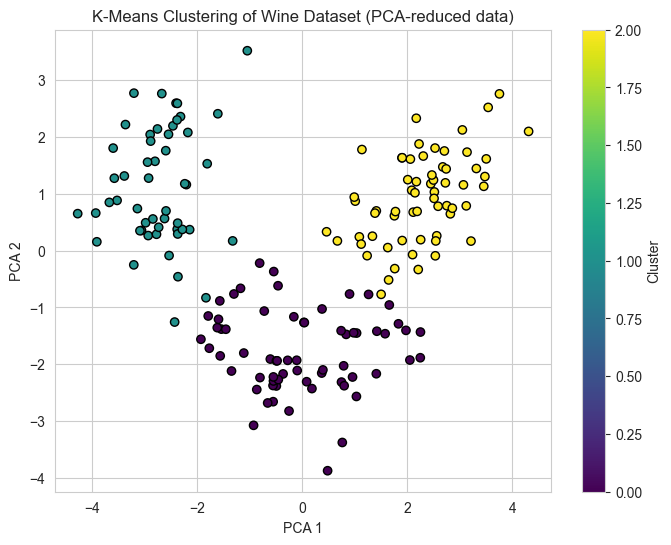

In [14]:
#SOLUTION_START
#a) Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the wine dataset
wine = load_wine()

# Convert to a Pandas DataFrame for easier exploration
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# Standardize the features (important for KMeans since it's distance-based)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Compare the K-Means clusters to the actual wine classes
print("Confusion Matrix:\n", confusion_matrix(y, clusters))
print("\nClassification Report:\n", classification_report(y, clusters))


#b) the K-measn clustering will construct clusters which are not related to the target variable. It will construct clusters which have nothing to do with the 3 wine categories

In [ ]:
#SOLUTION_START
#3c) Visualize the clusters (using PCA to reduce to 2 dimensions for plotting)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering of Wine Dataset (PCA-reduced data)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()
#SOLUTION_END

4. Load the concrete_data dataset and split in a training and a  test set (20% test set). What is the result of a decissiontree regressor  on the test set?

Mean Squared Error: 42.58102330097088
R² Score: 0.8347503240203619


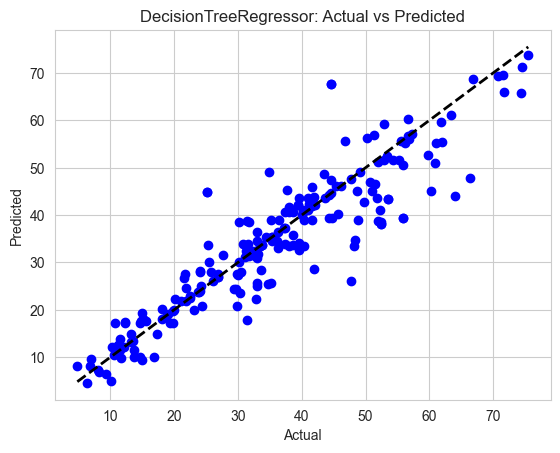

In [34]:
#SOLUTION_START
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('data/concrete_data.csv')
# Display the first few rows to understand the structure of the dataset
df.head()


# Features (input) and target variable
X = df.drop(columns=['csMPa'])
y = df['csMPa']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualize actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('DecisionTreeRegressor: Actual vs Predicted')
plt.show()
#SOLUTION_END

4. Load the concrete_data dataset and split in a training and a  test set (20% test set). What is the result of a random forestregressor  on the test set? Do we see an improvement?

Mean Squared Error: 29.854417119395947
R² Score: 0.8841401081258502


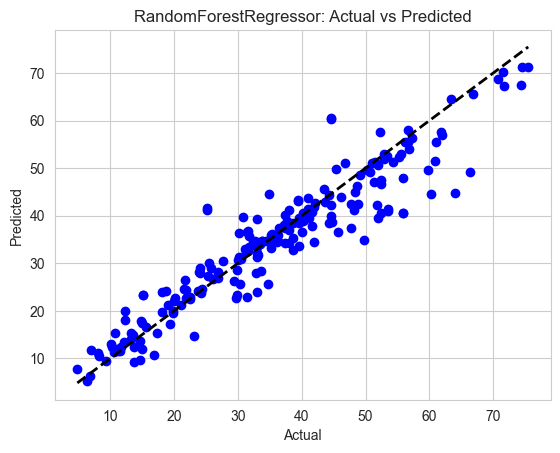

In [19]:
#SOLUTION_START
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Features (input) and target variable
X = df.drop(columns=['csMPa'])
y = df['csMPa']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualize actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForestRegressor: Actual vs Predicted')
plt.show()
#SOLUTION_END

4. Load the concrete_data dataset and use random forest again. Use gridsearch to determine the optimal number of trees in our forest.(test the folowing number of trees [10, 20,40, 50, 100,150, 200,250, 300, 350,450,500])

Best Parameters: {'n_estimators': 250}
Best Cross-Validation Score (Negative MSE): -25.958632092437988
Test Set Mean Squared Error: 30.461726142528935
Test Set R² Score: 0.8817832455727149


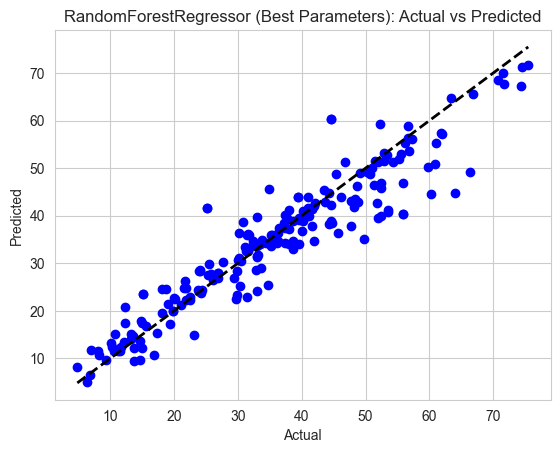

In [20]:
#SOLUTION_START
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Features (input) and target variable
X = df.drop(columns=['csMPa'])
y = df['csMPa']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Define the grid of parameters to search (different numbers of trees)
param_grid = {
    'n_estimators': [10, 20,40, 50, 100,150, 200,250, 300, 350,450,500]  # Different number of trees
}

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score (Negative MSE): {best_score}")

# Train the RandomForestRegressor using the optimal number of trees
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error: {mse}")
print(f"Test Set R² Score: {r2}")

# Visualize actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForestRegressor (Best Parameters): Actual vs Predicted')
plt.show()
#SOLUTION_END

Best Parameters: {'n_estimators': 250}
Best Cross-Validation Score (Negative MSE): -25.958632092437988
Test Set Mean Squared Error: 30.461726142528935
Test Set R² Score: 0.8817832455727149


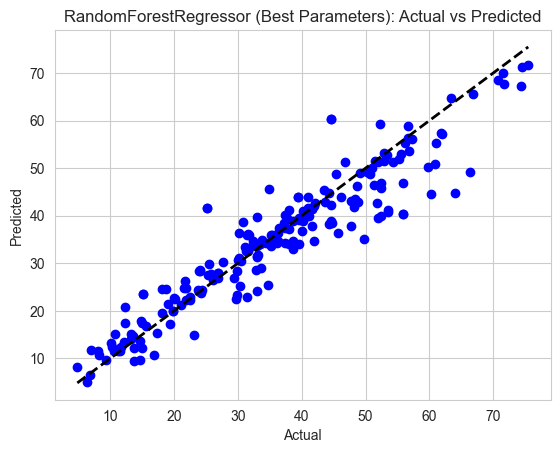

In [26]:
#SOLUTION_START
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Features (input) and target variable
X = df.drop(columns=['csMPa'])
y = df['csMPa']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Define the grid of parameters to search (different numbers of trees)
param_distributions = {
    'n_estimators': np.arange(10, 501, 10)  # values from 10 to 500 with step 10
}
# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score (Negative MSE): {best_score}")

# Train the RandomForestRegressor using the optimal number of trees
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error: {mse}")
print(f"Test Set R² Score: {r2}")

# Visualize actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForestRegressor (Best Parameters): Actual vs Predicted')
plt.show()
#SOLUTION_END

5. Go to the scikit-learn documentation and look for RandomizedSearchCV. Apply it for 10 different guesses between 10 and 500. What is the result for R-squared?

Best Parameters: {'n_estimators': np.int64(370)}
Best Cross-Validation Score (Negative MSE): -25.938729275711825
Test Set Mean Squared Error: 30.28425364718558
Test Set R² Score: 0.882471986003951


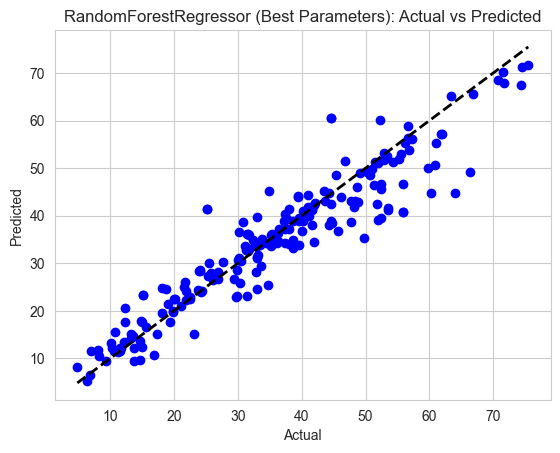

In [33]:
#SOLUTION_START
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Features (input) and target variable
X = df.drop(columns=['csMPa'])
y = df['csMPa']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Define the grid of parameters to search (different numbers of trees)
param_distributions = {
    'n_estimators': np.arange(10, 501, 10)  # values from 10 to 500 with step 10
}

# Set up the GridSearchCV with cross-validation
RS_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the training data
RS_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = RS_search.best_params_
best_score = RS_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score (Negative MSE): {best_score}")

# Train the RandomForestRegressor using the optimal number of trees
best_rf = RS_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error: {mse}")
print(f"Test Set R² Score: {r2}")

# Visualize actual vs predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForestRegressor (Best Parameters): Actual vs Predicted')
plt.show()
#SOLUTION_END

6. Finally apply a K-means clustering on the concrete dataset.
   a.What is the influence of a standard scaler on the clustering?
   b.What is the optimal number of clusters (elbow method, mean silhouette score)?
   c.Show for the cement and water features how the clusters are scattered.

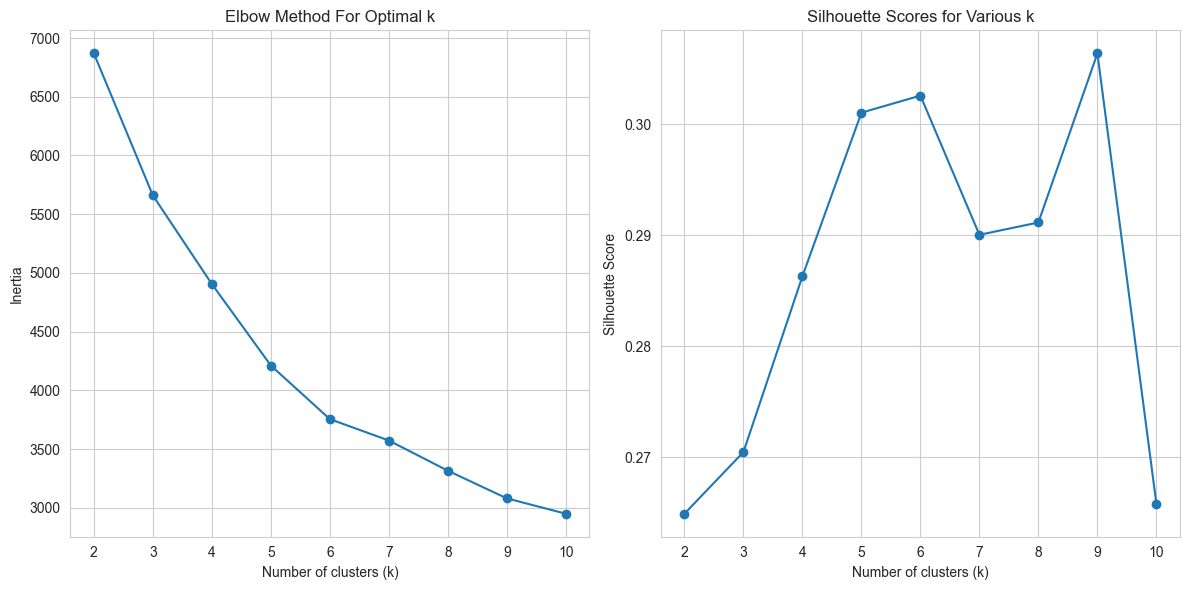

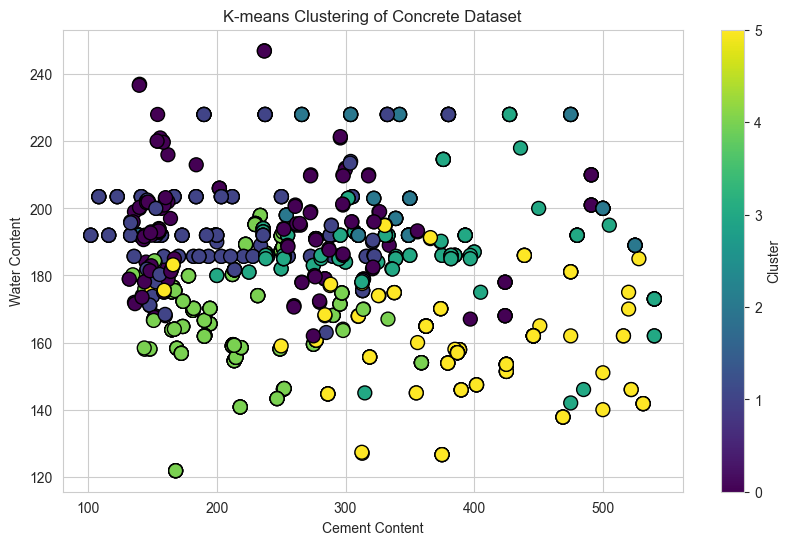

      cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0      540.0    0.0     0.0  162.0               2.5           1040.0   
1      540.0    0.0     0.0  162.0               2.5           1055.0   
2      332.5  142.5     0.0  228.0               0.0            932.0   
3      332.5  142.5     0.0  228.0               0.0            932.0   
4      198.6  132.4     0.0  192.0               0.0            978.4   
...      ...    ...     ...    ...               ...              ...   
1025   276.4  116.0    90.3  179.6               8.9            870.1   
1026   322.2    0.0   115.6  196.0              10.4            817.9   
1027   148.5  139.4   108.6  192.7               6.1            892.4   
1028   159.1  186.7     0.0  175.6              11.3            989.6   
1029   260.9  100.5    78.3  200.6               8.6            864.5   

      fineaggregate  age  csMPa  Cluster  
0             676.0   28  79.99        3  
1             676.0   28  61.89      

In [36]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



# Features for clustering
X = df.drop(columns=['csMPa'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
K = range(2, 11)  # Testing cluster sizes from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the elbow method
plt.figure(figsize=(12, 6))

# Elbow method plot
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()
#b probably 6 will be the optimal if we view the graphs
# Choose the optimal number of clusters (you can choose based on the plots)
optimal_k = 6  # Example: choose based on the elbow and silhouette score analysis

# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

#c Visualize the clustering result (plotting two features:cement and water)
plt.figure(figsize=(10, 6))
plt.scatter(df['cement'], df['water'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('K-means Clustering of Concrete Dataset')
plt.xlabel('Cement Content')
plt.ylabel('Water Content')
plt.colorbar(label='Cluster')
plt.show()

# Display the DataFrame with cluster labels
print(df)

